# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 2

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
def MLPReg(N2, momentum, learning_rate, epochs):
    return MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)
def MLPClassif(N2, momentum, learning_rate, epochs):
    return MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

In [3]:
def entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, funcion_error):
    error_val = []
    error_train = []
    error_test = []
    min_error_val = float('inf')

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        aux_err_val = funcion_error(y_val, red.predict(X_val))

        if aux_err_val < min_error_val:
            min_error_val = aux_err_val
            best_red = copy.deepcopy(red)

        error_val.append(aux_err_val)
        error_train.append(funcion_error(y_train, red.predict(X_train)))
        error_test.append(funcion_error(y_test, red.predict(X_test)))

    return best_red, error_train, error_val, error_test

def error_regresion(y, y_pred):
    return sk.metrics.mean_squared_error(y, y_pred)

def error_clasificacion(y, y_pred):
    return sk.metrics.zero_one_loss(y, y_pred)

def entrenar_red_regresion(regr, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    return entrenar_red(regr, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, error_regresion)

def entrenar_red_clasificacion(clasif, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    return entrenar_red(clasif, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, error_clasificacion)

In [18]:
def plot_errors(error_train, error_val, error_test, epocas, evaluaciones):
    rango = np.array(range(evaluaciones)) * epocas
    plt.figure(figsize=(15, 5))
    plt.title('Errores')
    plt.plot(rango, error_train, label='Error de Entrenamiento', color='red', linestyle="-")
    plt.plot(rango, error_val, label='Error de Validacion', color='blue', linestyle="-")
    plt.plot(rango, error_test, label='Error de Test', color='green', linestyle="-")
    plt.legend()
    plt.show()

## Ejercicio 1

In [78]:
def inside_circle(x,y):
  return np.linalg.norm([x,y]) <= 1

def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def in_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def in_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    for i in [1, 3, 5, 7]:
        if in_curve(rho, theta, i):
            return True
    return False

def espirales(n):
  half = int(n/2)
  bothClass = []
  countClass0 = 0
  countClass1 = 0

  while (countClass0 < half or countClass1 < n-half):
    gen = np.random.uniform(-1,1,size=(half,2))
    for (x,y) in gen:
      if (inside_circle(x,y)):
        if (in_curves(x,y)):
          if (countClass0 < half):
            bothClass.append([x,y,0])
            countClass0 += 1
        else:
          if (countClass1 < n - half):
            bothClass.append([x,y,1])
            countClass1 += 1
  df = pd.DataFrame(bothClass, columns=['dim_0', 'dim_1', 'class'])
  return df

In [79]:
espiralesTrain = espirales(600)
espiralesTest = espirales(2000)

X_t = espiralesTrain.drop(columns=['class'])
y_t = espiralesTrain['class']
X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X_t, y_t, test_size=0.2, random_state=0)

X_test = espiralesTest.drop(columns=['class'])
y_test = espiralesTest['class']

In [80]:
N2List = [2, 10, 20, 40]
learning_rate = 0.1
momentum = 0.9
epochs = 20
evals = 1000

error_train_proms = []
error_val_proms = []
error_test_proms = []

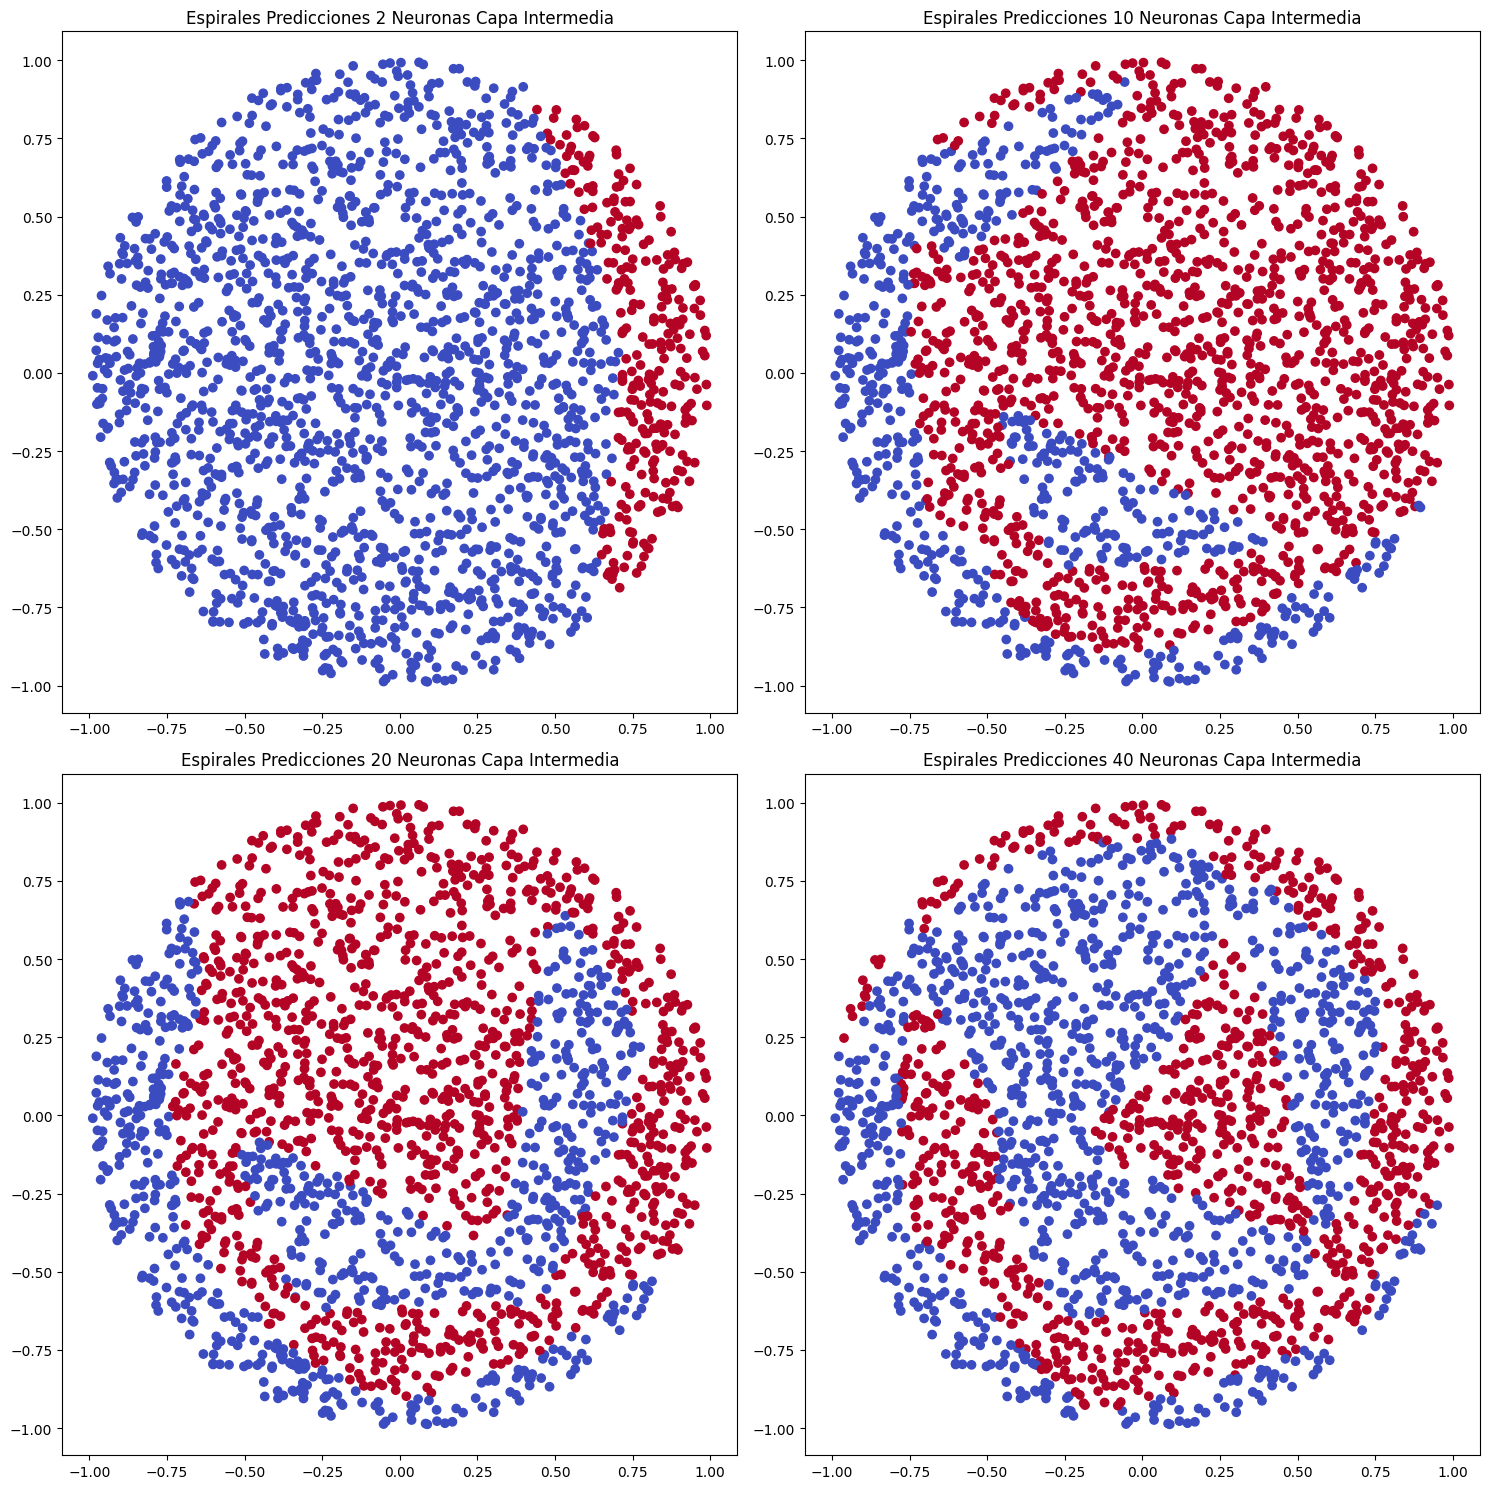

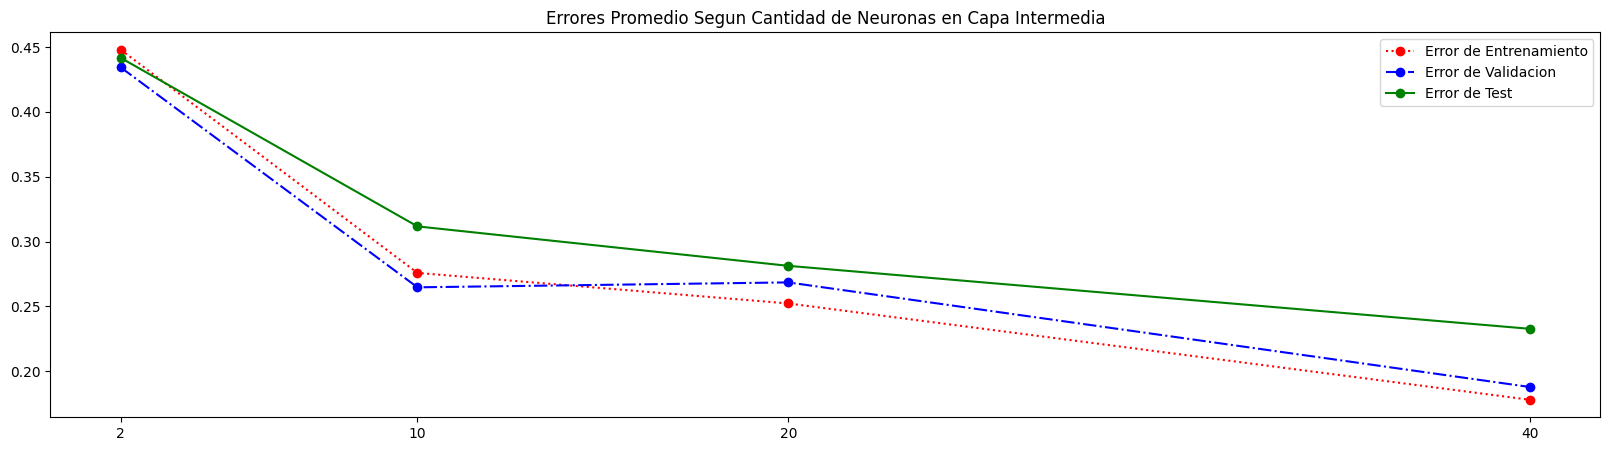

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for idx, N2 in enumerate(N2List):
    clasif = MLPClassif(N2, momentum, learning_rate, epochs)
    best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
    ax = axs[idx // 2, idx % 2]
    ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_red.predict(X_test), cmap='coolwarm')
    ax.set_title(f'Espirales Predicciones {N2} Neuronas Capa Intermedia')
    error_train_proms.append(np.mean(error_train))
    error_val_proms.append(np.mean(error_val))
    error_test_proms.append(np.mean(error_test))

plt.tight_layout()

fig_large, ax_large = plt.subplots(figsize=(20, 5))
ax_large.plot(N2List, error_train_proms, label='Error de Entrenamiento', color='red', linestyle=":", marker='o')
ax_large.plot(N2List, error_val_proms, label='Error de Validacion', color='blue', linestyle="-.", marker='o')
ax_large.plot(N2List, error_test_proms, label='Error de Test', color='green', linestyle="-", marker='o')
ax_large.set_xticks(N2List, labels=[str(N_2) for N_2 in N2List])
ax_large.legend()
ax_large.set_title('Errores Promedio Segun Cantidad de Neuronas en Capa Intermedia')

plt.show()


## Ejercicio 2


In [5]:
csv = pd.read_csv('dos_elipses.data', names=['dim_0', 'dim_1', 'class']).sample(n=500, random_state=0)
X = csv.drop(columns=['class'])
y = csv['class']

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

csv = pd.read_csv('dos_elipses.test', names=['dim_0', 'dim_1', 'class']).sample(n=2000, random_state=0)
X_test = csv.drop(columns=['class'])
y_test = csv['class']

In [6]:
N2 = 6
learning_rates = [0.1, 0.05, 0.01]
momentums = [0.55, 0.75, 0.95]
epochs = 50
evals = 300

In [7]:
# fig, axs = plt.subplots(4, 4, figsize=(15, 15))
error_test_proms = []
best_reds = {}

for learning_rate in learning_rates:
    for momentum in momentums:
        aux_error_test_proms = []
        min_error_test = float('inf')
        for i in range(10):
            clasif = MLPClassif(N2, momentum, learning_rate, epochs)
            best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

            aux_error_test = error_clasificacion(y_test, best_red.predict(X_test))
            if aux_error_test < min_error_test:
                min_error_test = aux_error_test
                true_best_red = (best_red, error_train, error_val, error_test)

            aux_error_test_proms.append(aux_error_test)
            
        best_reds[(learning_rate,momentum)] = true_best_red
        error_test_proms.append(f'(LR: {learning_rate}, M: {momentum}): {np.mean(aux_error_test_proms)}\n')

print("Errores Test\n")
for err in error_test_proms:
    print(err)

# print("Mejor Red\n" + str(best_reds))
# plt.tight_layout()

# fig_large, ax_large = plt.subplots(figsize=(20, 5))
# ax
# ax_large.plot(N2List, error_train_proms, label='Error de Entrenamiento', color='red', linestyle=":", marker='o')
# ax_large.plot(N2List, error_val_proms, label='Error de Validacion', color='blue', linestyle="-.", marker='o')
# ax_large.plot(N2List, error_test_proms, label='Error de Test', color='green', linestyle="-", marker='o')
# ax_large.legend()
# ax_large.set_title('Errores Promedio Segun Cantidad de Neuronas en Capa Intermedia')

# plt.show()

Errores Test

(LR: 0.1, M: 0.55): 0.14784999999999998

(LR: 0.1, M: 0.75): 0.0869

(LR: 0.1, M: 0.95): 0.14124999999999996

(LR: 0.05, M: 0.55): 0.16639999999999996

(LR: 0.05, M: 0.75): 0.09899999999999998

(LR: 0.05, M: 0.95): 0.09179999999999999

(LR: 0.01, M: 0.55): 0.23665000000000003

(LR: 0.01, M: 0.75): 0.19059999999999996

(LR: 0.01, M: 0.95): 0.1258



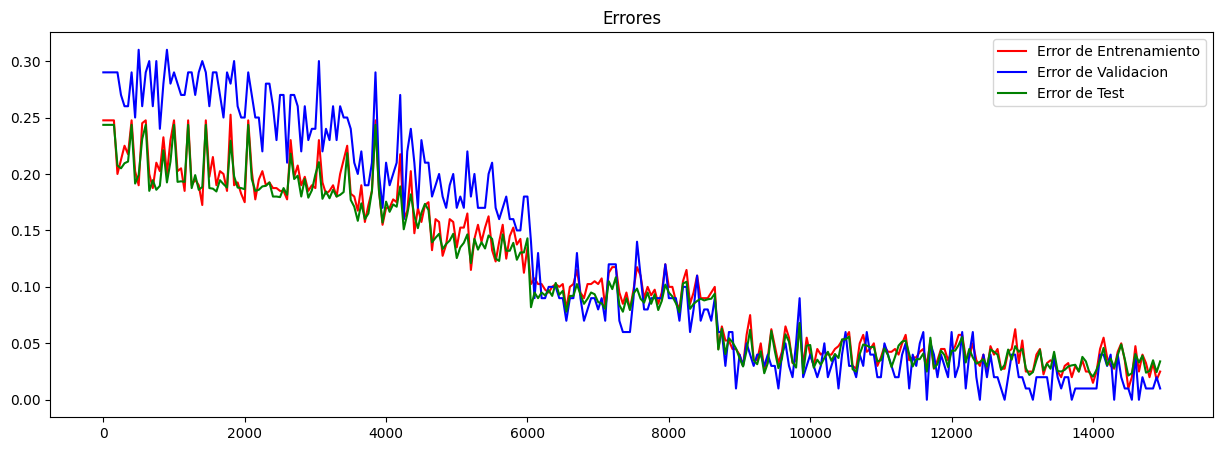

In [19]:
lr = 0.1
m = 0.75

best_red, error_train, error_val, error_test = best_reds[(lr, m)]
plot_errors(error_train, error_val, error_test, epochs, evals)

## Ejercicio 3

In [85]:
data = pd.DataFrame(np.loadtxt('ikeda.data'))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('ikeda.test')).sample(n=2000, random_state=0)
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

In [86]:
N2 = 30
learning_rate = 0.01
momentum = 0.9
epochs = 50
evals = 400
test_sizes = [0.05, 0.25, 0.5]

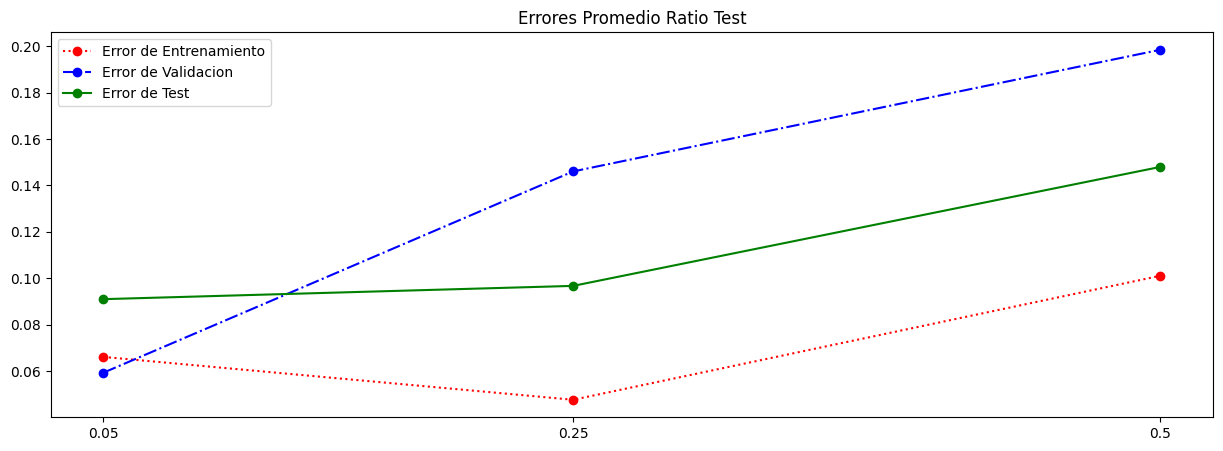

In [87]:
plt.figure(figsize=(15, 5))
error_train_proms = []
error_val_proms = []
error_test_proms = []

for test_size in test_sizes:
        reg = MLPReg(N2, momentum, learning_rate, epochs)
        X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=test_size, random_state=0)
        best_red, error_train, error_val, error_test = entrenar_red_regresion(reg, evals, X_train, y_train, X_val, y_val, X_test, y_test)
        error_train_proms.append(np.mean(error_train))
        error_val_proms.append(np.mean(error_val))
        error_test_proms.append(np.mean(error_test))

plt.plot(test_sizes, error_train_proms, label='Error de Entrenamiento', color='red', linestyle=":", marker='o')
plt.plot(test_sizes, error_val_proms, label='Error de Validacion', color='blue', linestyle="-.", marker='o')
plt.plot(test_sizes, error_test_proms, label='Error de Test', color='green', linestyle="-", marker='o')
plt.xticks(test_sizes, labels=[str(test_size) for test_size in test_sizes])
plt.legend()
plt.title('Errores Promedio Ratio Test')

plt.show()

## Ejercicio 4

In [ ]:
N2 = 6
learning_rate = 0.05
momentum = 0.3
epochs = 20
evals = 4000
gammas = [10^-x for x in range(0, 7)]

In [ ]:
def MLPRegEj4(N2, momentum, learning_rate, epochs, gamma):
    return MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

def entrenar_red_ej4(red, evaluaciones, X_train, y_train, X_test, y_test):
    error_train = []
    error_test = []
    min_weight_sum = float('inf')

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        weight = red.coefs_
        weight_sum = [np.sum(np.square(w)) for w in weight]

        if weight_sum < min_weight_sum:
            min_weight_sum = weight_sum
            best_red = copy.deepcopy(red)

        error_train.append(sk.metrics.mean_squared_error(y_train, red.predict(X_train)))
        error_test.append(sk.metrics.mean_squared_error(y_test, red.predict(X_test)))

    return best_red, error_train, error_val, error_test